# Title: AIDI 1002 Final Term Project Report

#### Members' Names or Individual's Name: Ankita Ankita and Varun Patel

####  Emails:ankitach59@gmail.com and patelvarun4674@gmail.com

# Introduction:

#### Problem Description:

* Natural language processing research in social media continues to develop, with new tasks and datasets being introduced every year, but this fragmentation makes determining the state of the art in the field challenging because there is no standardised evaluation protocol or set of baselines for domain specific data to address this problem. 
* A group of researchers has created Tweet eval, a new evaluation framework that covers seven classification tasks, namely Emotion Recognition, Emoji Prediction, Irony Detection, Hate Speech Detection, Offensive Language Identification, Sentiment Analysis, and Stance Detection related to Twitter. They also provide a set of robust baseline models and evaluate several language modelling pre training methodologies.
* Their initial results indicate that starting with pre-trained generic language models and fine-tuning on Twitter corpora can be effective.

#### Context of the Problem:

* Social media networks creates massive amount of text data which makes it challenging to capture useful insights without the help of advance natural language processing techiniques. Addressing this problem could help us to analyse social media text and understand public sentiment, opinions, and behavior.
* Modern NLP systems are typically ill-equipped when applied to noisy user-generated text. The high-paced, conversational and idiosyncratic nature of social media, paired with platform-specific restrictions (e.g., Twitter’s character limit), requires tackling additional challenges.
* In other more generic contexts, these challenges can be considered solved or are simply non-existent.
* Moreover, other apparently simple tasks such as sentiment analysis have proven to be hard on Twitter data (Poria et al., 2020), among others, due to limited amount of contextual cues available in short texts.

#### Limitation About other Approaches:

* The drawback of other approaches is it's inability to perform tasks such as part-of-speech tagging, named entity recognition, and sentiment analysis. The main reason behind it is the limited amount of contextual cues available in short texts, which makes tasks difficult, such as analyzing writer's sentiment.

#### Solution:

* The above mentioned problems has been solved by creating TWEETEVAL.
* Various pre-trained language models have been used as baselines for TWEETEVAL, including BERT, RoBERTa, DistilBERT, ALBERT, ELECTRA, and Longformer.
* The models were trained and evaluated on a variety of datasets, including public datasets such as SemEval, OffensEval, and EmoReact, as well as new datasets specifically created for TWEETEVAL.
* The Twikenizer tokenizer was used, which is Twitter-specific and provides better performance than the original Roberta-base tokenizer on tweet data.

# Background

Explain the related work using the following table

| Reference |Explanation |  Dataset/Input |Weakness/Improvement
| --- | --- | --- | --- |
| Devlin et al., NAACL (2019) [1] | They trained a new language representation model called BERT that is designed to pre-train deep bidirectional representations from unlabeled text by jointly conditioning on both left and right context in all layers. | CPED, CoLA, CoNLL-2003, CoQA, DBpedia, GLUE, MRPC, MRQA, ManyTypes4TypeScript, MultiNLI, MultiRC, NCBI Disease, QNLI, Quora Question Pairs, RTE, ReCoRD, SQuAD, SST, STS Benchmark, SWAG, SciERC, SentEval, SuperGLUE, TriviaQA, WSC, XNLI | BERT's performance may not generalize well to tasks that are significantly different.
| Gimpel et al., ACL (2011) [2] | They addressed the problem of part-of-speech tagging for English data from the popular microblogging service Twitter. | TAGDICT, DISTSIM, METAPH | Annotated data can be used for research into domain adaptation and semi-supervised learning.
| Barbieri et al. (2021) [3] | They propose a new evaluation framework (TWEETEVAL) consisting of seven heterogeneous Twitter-specific classification tasks. | Emoji, Emotion, Hate, Irony, Offensive, Sentiment, Stance(fem)  | Using more Twitter data for training might further improve the results of RoB-Tw, but this would also translate into an even more expensive training. 

# Methodology

Provide details of the existing paper method and your contribution that you are implementing in the next section with figure(s).

* At the start, the article compiles, curates, and publishes a set of tasks with an organized structure under the heading of the TWEETEVAL benchmark. Secondly, given this new paradigm, the study examines state-of-the-art language models and provides light on the effect of training with diverse datasets.
* For evaluating, we need an individual predictions file for each of the tasks.

#### Our Contribution

* Evaluation of models: Testing the generalizability of models by evaluating their performance on datasets that are different from those they were trained on.
* Have also created small test_data.csv for testing.

# Implementation

### Usage of TweetEval and Twitter-specific RoBERTa models

In this notebook we show how to perform tasks such as masked language modeling, computing tweet similarity or tweet classificationo using our Twitter-specific RoBERTa models.

- Paper: [_TweetEval_ benchmark (Findings of EMNLP 2020)](https://arxiv.org/pdf/2010.12421.pdf)
- Authors: Francesco Barbieri, Jose Camacho-Collados, Luis Espinosa-Anke and Leonardo Neves.
- [Github](https://github.com/cardiffnlp/tweeteval)


#### Preliminaries

We define a function to normalize a tweet to the format we used for TweetEval. Note that preprocessing is minimal (replacing user names by `@user` and links by `http`).

In [28]:
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

We only need to install one dependnecy: the `transformers` library.

In [29]:
!pip install transformers
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
import warnings
warnings.filterwarnings("ignore")

#### Computing Tweet Similarity

In [31]:
from transformers import AutoTokenizer, AutoModel, TFAutoModel
import numpy as np
from scipy.spatial.distance import cosine
from collections import defaultdict

MODEL = "cardiffnlp/twitter-roberta-base"

tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModel.from_pretrained(MODEL)

def get_embedding(text):
  text = preprocess(text)
  encoded_input = tokenizer(text, return_tensors='pt')
  features = model(**encoded_input)
  features = features[0].detach().cpu().numpy() 
  features_mean = np.mean(features[0], axis=0) 
  return features_mean

query = "The book was awesome"

tweets = ["I just ordered fried chicken 🐣", 
          "The movie was great", 
          "What time is the next game?", 
          "Just finished reading 'Embeddings in NLP'"]

d = defaultdict(int)
for tweet in tweets:
  sim = 1-cosine(get_embedding(query),get_embedding(tweet))
  d[tweet] = sim

print('Most similar to: ',query)
print('----------------------------------------')
for idx,x in enumerate(sorted(d.items(), key=lambda x:x[1], reverse=True)):
  print(idx+1,x[0])

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.decoder.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Most similar to:  The book was awesome
----------------------------------------
1 The movie was great
2 Just finished reading 'Embeddings in NLP'
3 I just ordered fried chicken 🐣
4 What time is the next game?


#### Evaluate its effectiveness in different contexts.

##### Test 1

In [32]:
query = "The performance was outstanding"

tweets = ["The concert was amazing",
          "The meal was delicious",
          "The view from the top of the mountain was breathtaking",
          "The party was a blast",
          "The hotel room was fantastic",
          "The play was captivating",
          "The sunset was beautiful",
          "The dance routine was impressive",
          "The lecture was enlightening"]

d = defaultdict(int)
for tweet in tweets:
  sim = 1-cosine(get_embedding(query),get_embedding(tweet))
  d[tweet] = sim

print('Most similar to: ',query)
print('----------------------------------------')
for idx,x in enumerate(sorted(d.items(), key=lambda x:x[1], reverse=True)):
  print(idx+1,x[0])

Most similar to:  The performance was outstanding
----------------------------------------
1 The concert was amazing
2 The play was captivating
3 The dance routine was impressive
4 The meal was delicious
5 The sunset was beautiful
6 The lecture was enlightening
7 The hotel room was fantastic
8 The party was a blast
9 The view from the top of the mountain was breathtaking


##### Test 2

In [33]:
query = "The presentation by the guest speaker was inspiring"

tweets = ["The new restaurant in town has amazing food",
          "The concert last night was incredible",
          "The sunset at the beach was breathtaking",
          "The hiking trail we went on was stunning"]

d = defaultdict(int)
for tweet in tweets:
  sim = 1-cosine(get_embedding(query),get_embedding(tweet))
  d[tweet] = sim

print('Most similar to: ',query)
print('----------------------------------------')
for idx,x in enumerate(sorted(d.items(), key=lambda x:x[1], reverse=True)):
  print(idx+1,x[0])

Most similar to:  The presentation by the guest speaker was inspiring
----------------------------------------
1 The concert last night was incredible
2 The sunset at the beach was breathtaking
3 The hiking trail we went on was stunning
4 The new restaurant in town has amazing food


### Feature Extraction

In [34]:
from transformers import AutoTokenizer, AutoModel, TFAutoModel
import numpy as np

MODEL = "cardiffnlp/twitter-roberta-base"
text = "Good night 😊"
text = preprocess(text)
tokenizer = AutoTokenizer.from_pretrained(MODEL)

# Pytorch
encoded_input = tokenizer(text, return_tensors='pt')
model = AutoModel.from_pretrained(MODEL)
features = model(**encoded_input)
features = features[0].detach().cpu().numpy() 
features_mean = np.mean(features[0], axis=0) 
#features_max = np.max(features[0], axis=0)

# # Tensorflow
# encoded_input = tokenizer(text, return_tensors='tf')
# model = TFAutoModel.from_pretrained(MODEL)
# features = model(encoded_input)
# features = features[0].numpy()
# features_mean = np.mean(features[0], axis=0) 
# #features_max = np.max(features[0], axis=0)

features_mean.shape

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.decoder.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


(768,)

#### Evaluate its effectiveness.

##### Test 1

In [35]:
text = "Hey, How are you!"
text = preprocess(text)
tokenizer = AutoTokenizer.from_pretrained(MODEL)

# Pytorch
encoded_input = tokenizer(text, return_tensors='pt')
model = AutoModel.from_pretrained(MODEL)
features = model(**encoded_input)
features = features[0].detach().cpu().numpy() 
features_mean = np.mean(features[0], axis=0) 

features_mean.shape

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.decoder.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


(768,)

##### Test 2

In [36]:
text = "Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-emotion were not used when initializing RobertaModel"
text = preprocess(text)
tokenizer = AutoTokenizer.from_pretrained(MODEL)

# Pytorch
encoded_input = tokenizer(text, return_tensors='pt')
model = AutoModel.from_pretrained(MODEL)
features = model(**encoded_input)
features = features[0].detach().cpu().numpy() 
features_mean = np.mean(features[0], axis=0) 

features_mean.shape

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.decoder.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


(768,)

### Masked language modeling

Use Twitter-RoBERTA-base to predict words in context using the `fill-mask` pipeline in `transformers`.

In [37]:
from transformers import pipeline, AutoTokenizer
import numpy as np

MODEL = "cardiffnlp/twitter-roberta-base"
fill_mask = pipeline("fill-mask", model=MODEL, tokenizer=MODEL)
tokenizer = AutoTokenizer.from_pretrained(MODEL)

def print_candidates():
    for i in range(5):
        token = tokenizer.decode(candidates[i]['token'])
        score = np.round(candidates[i]['score'], 4)
        print(f"{i+1}) {token} {score}")

texts = [
 "I am so <mask> 😊",
 "I am so <mask> 😢" 
]
for text in texts:
    t = preprocess(text)
    print(f"{'-'*30}\n{t}")
    candidates = fill_mask(t)
    print_candidates()

------------------------------
I am so <mask> 😊
1)  happy 0.402
2)  excited 0.1441
3)  proud 0.143
4)  grateful 0.0669
5)  blessed 0.0334
------------------------------
I am so <mask> 😢
1)  sad 0.2641
2)  sorry 0.1605
3)  tired 0.138
4)  sick 0.0278
5)  hungry 0.0232


#### Evaluate its effectiveness.

##### Test

In [38]:
texts = [
 "I am so <mask> 😂",
 "I am so <mask> 😴",
 "I am so <mask> 😭",
 "I think I should <mask> 😴 now",
 "Why are you <mask> 🤦‍♂️"
]
for text in texts:
    t = preprocess(text)
    print(f"{'-'*30}\n{t}")
    candidates = fill_mask(t)
    print_candidates()

------------------------------
I am so <mask> 😂
1)  funny 0.1243
2)  weak 0.0834
3)  dead 0.0624
4)  mad 0.0606
5)  confused 0.0418
------------------------------
I am so <mask> 😴
1)  tired 0.3616
2)  sleepy 0.093
3)  hungry 0.0836
4)  exhausted 0.05
5)  bored 0.0433
------------------------------
I am so <mask> 😭
1)  tired 0.1087
2)  sorry 0.0985
3)  sad 0.0946
4)  mad 0.0515
5)  happy 0.0327
------------------------------
I think I should <mask> 😴 now
1)  sleep 0.3294
2)  go 0.0601
3)  quit 0.0559
4)  stop 0.0443
5)  drink 0.0369
------------------------------
Why are you <mask> 🤦‍♂️
1)  lying 0.0518
2) ? 0.0476
3)  crying 0.0452
4)  single 0.0341
5)  asking 0.0295


### Use TweetEval Classifiers

We currently provide the following fine-tuned models for different tweet classification tasks:

- emoji prediction (`emoji`)
- emotion detection (`emotion`)
- hate speech detection (`hate`)
- irony detection (`irony`)
- offensive language identification (`offensive`)
- sentiment analysis (`sentiment`)
- _(coming soon)_ stance detection (`stance`) with 5 targets (`abortion`, `atheism`, `climate`, `feminist`, `hillary`), for example: `stance-abortion`


In [39]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request

task='emotion'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

tokenizer = AutoTokenizer.from_pretrained(MODEL)

In [40]:
# download label mapping
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]

In [41]:
# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

text = "Good night 😊"
text = preprocess(text)
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)

# # TF
# model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)

# text = "Good night 😊"
# encoded_input = tokenizer(text, return_tensors='tf')
# output = model(encoded_input)
# scores = output[0][0].numpy()
# scores = softmax(scores)

In [42]:
ranking = np.argsort(scores)
ranking = ranking[::-1]
for i in range(scores.shape[0]):
    l = labels[ranking[i]]
    s = scores[ranking[i]]
    print(f"{i+1}) {l} {np.round(float(s), 4)}")

1) joy 0.9061
2) optimism 0.0407
3) sadness 0.0406
4) anger 0.0126


#### Evaluate its effectiveness.

##### Test

In [43]:
texts = ["Have a great evening! 🌅",
         "Take care, friend! 🤗",
         "Goodbye for now! 🙋‍♀️",
         "Until we meet again! 💖",
         "Wishing you a peaceful night! 🌙"]

for t in texts:
    text = preprocess(t)
    encoded_input = tokenizer(text, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    ranking = np.argsort(scores)
    ranking = ranking[::-1]
    print("For: ", t)
    for i in range(scores.shape[0]):
        l = labels[ranking[i]]
        s = scores[ranking[i]]
        print(f"{i+1}) {l} {np.round(float(s), 4)}")
    print()

For:  Have a great evening! 🌅
1) joy 0.9331
2) optimism 0.0456
3) anger 0.0108
4) sadness 0.0105

For:  Take care, friend! 🤗
1) joy 0.8219
2) optimism 0.1391
3) sadness 0.0257
4) anger 0.0132

For:  Goodbye for now! 🙋‍♀️
1) sadness 0.4875
2) joy 0.3914
3) optimism 0.0874
4) anger 0.0338

For:  Until we meet again! 💖
1) joy 0.9016
2) optimism 0.0561
3) sadness 0.0288
4) anger 0.0135

For:  Wishing you a peaceful night! 🌙
1) joy 0.8744
2) optimism 0.082
3) sadness 0.0304
4) anger 0.0132



#### Evaluating on test data that we have created

In [44]:
import pandas as pd

In [45]:
test_data = pd.read_csv('test_data.csv')
test_data.head()

,text,label
0,I am so happy today!,0
1,I can't wait to start my new job!,1
2,I can't believe you did that,3
3,I'm feeling really down today,4
4,This is the best day ever!,0


In [46]:
test_data.shape

(56, 2)

In [47]:
label_dict = {
    0: 'joy',
    1: 'optimism',
    3: 'anger',
    4: 'sadness'
}

def predict(x):
    text = preprocess(x)
    encoded_input = tokenizer(text, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    ranking = np.argsort(scores)
    ranking = ranking[::-1]
    for i in range(scores.shape[0]):
        l = labels[ranking[i]]
        s = scores[ranking[i]]

    index = ranking[0]
    label = labels[index]
    label_int = [k for k, v in label_dict.items() if v == label][0]
    return label_int

In [48]:
from sklearn.metrics import classification_report

y_true = test_data['label']
y_pred = [predict(x) for x in test_data['text']]
print(y_pred)

[0, 0, 3, 4, 0, 1, 3, 4, 0, 0, 3, 4, 1, 1, 3, 4, 0, 1, 3, 4, 0, 1, 3, 4, 0, 1, 3, 4, 0, 1, 3, 4, 0, 1, 3, 4, 0, 1, 3, 4, 0, 1, 3, 4, 0, 1, 3, 4, 0, 1, 3, 4, 0, 1, 3, 4]


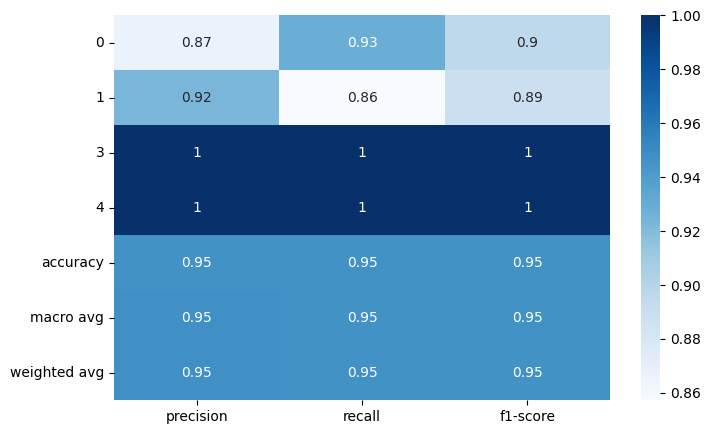

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Assuming 'report' is the classification report as shown in the question
report_dict = classification_report(y_true, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Removing support column for easier visualization
report_df.drop(columns='support', inplace=True)

# Creating heatmap
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(report_df, annot=True, cmap='Blues', ax=ax)

plt.show()

Based on the above classification report, it is evident that model is performing very well as we're getting an accuracy of 95% on testing dataset that has been completely unseen by the model before.

### Additional Implementation

#### Twitter-roBERTa-base for Irony Detection

In [51]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request

# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = [
    ]
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

# Tasks:
# emoji, emotion, hate, irony, offensive, sentiment
# stance/abortion, stance/atheism, stance/climate, stance/feminist, stance/hillary

task='irony'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

tokenizer = AutoTokenizer.from_pretrained(MODEL)

# download label mapping
labels=[]
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]

# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.save_pretrained(MODEL)

text = "Great, it broke the first day..."
text = preprocess(text)
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)

# # TF
# model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)
# model.save_pretrained(MODEL)

# text = "Great, it broke the first day..."
# encoded_input = tokenizer(text, return_tensors='tf')
# output = model(encoded_input)
# scores = output[0][0].numpy()
# scores = softmax(scores)

ranking = np.argsort(scores)
ranking = ranking[::-1]
for i in range(scores.shape[0]):
    l = labels[ranking[i]]
    s = scores[ranking[i]]
    print(f"{i+1}) {l} {np.round(float(s), 4)}")


1) irony 0.914
2) non_irony 0.086


#### Evaluate its effectiveness.

##### Test

In [52]:
texts = ['"Oh great, another meeting" (when you really don\'t want to attend)', #Irony
         '"Fantastic, I just love getting stuck in traffic" (when you\'re obviously frustrated)', #Irony
         '"I\'m really looking forward to my vacation next week"', #Irony
         "Thanks for the birthday gift, I really appreciate it", #Irony
        '“If it rains on your wedding day, that\'s a coincidence, not an irony.”' ] #Non-irony 

for t in texts:
    text = preprocess(t)
    encoded_input = tokenizer(text, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    
    ranking = np.argsort(scores)
    ranking = ranking[::-1]
    print("For: ", t)
    for i in range(scores.shape[0]):
        l = labels[ranking[i]]
        s = scores[ranking[i]]
        print(f"{i+1}) {l} {np.round(float(s), 4)}")
    print()

For:  "Oh great, another meeting" (when you really don't want to attend)
1) irony 0.9353
2) non_irony 0.0647

For:  "Fantastic, I just love getting stuck in traffic" (when you're obviously frustrated)
1) irony 0.9492
2) non_irony 0.0508

For:  "I'm really looking forward to my vacation next week"
1) irony 0.9366
2) non_irony 0.0634

For:  Thanks for the birthday gift, I really appreciate it
1) irony 0.7153
2) non_irony 0.2847

For:  “If it rains on your wedding day, that's a coincidence, not an irony.”
1) non_irony 0.8468
2) irony 0.1532



#### Twitter-roBERTa-base for Offensive Language Identification

In [53]:
task='offensive'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

tokenizer = AutoTokenizer.from_pretrained(MODEL)

In [54]:
# download label mapping
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]

In [55]:
# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

text = "Good night 😊"
text = preprocess(text)
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)

# # TF
# model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)

# text = "Good night 😊"
# encoded_input = tokenizer(text, return_tensors='tf')
# output = model(encoded_input)
# scores = output[0][0].numpy()
# scores = softmax(scores)

In [56]:
ranking = np.argsort(scores)
ranking = ranking[::-1]
for i in range(scores.shape[0]):
    l = labels[ranking[i]]
    s = scores[ranking[i]]
    print(f"{i+1}) {l} {np.round(float(s), 4)}")

1) not-offensive 0.9073
2) offensive 0.0927


#### Evaluate its effectiveness.

##### Test

In [57]:
texts = ["Get the hell out of here 😤",
         "Take care, friend! 🤗",
         "Who the heck are you?",
         "Until we meet again! 💖",
         "Wishing you a peaceful night! 🌙"]

for t in texts:
    text = preprocess(t)
    encoded_input = tokenizer(text, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    ranking = np.argsort(scores)
    ranking = ranking[::-1]
    print("For: ", t)
    for i in range(scores.shape[0]):
        l = labels[ranking[i]]
        s = scores[ranking[i]]
        print(f"{i+1}) {l} {np.round(float(s), 4)}")
    print()

For:  Get the hell out of here 😤
1) offensive 0.77
2) not-offensive 0.23

For:  Take care, friend! 🤗
1) not-offensive 0.9699
2) offensive 0.0301

For:  Who the heck are you?
1) offensive 0.8538
2) not-offensive 0.1462

For:  Until we meet again! 💖
1) not-offensive 0.972
2) offensive 0.028

For:  Wishing you a peaceful night! 🌙
1) not-offensive 0.9556
2) offensive 0.0444



# Conclusion and Future Direction

* This project taught me about the difficulties of natural language processing on social media sites, particularly Twitter, as well as the fragmented landscape of assessment methods for various classification tasks.
* Moreover, I learnt that examination of various language modelling pre-training methodologies and training them could be beneficial and effective.
* The project's limitations include the fact that it mainly focuses on English tweets and that the evaluation is based on a small number of datasets.
* To better represent the heterogeneity and complexity of social media text, future research can extend the TWEETEVAL framework to additional languages and incorporate more diverse datasets.

# References:

[1]:  Jacob Devlin, Ming-Wei Chang, Kenton Lee, and Kristina Toutanova. 2019. BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding. In Proceedings of the 2019 Conference of the North American Chapter of the Association for Computational Linguistics: Human Language Technologies, Volume 1 (Long and Short Papers), pages 4171–4186, Minneapolis, Minnesota. Association for Computational Linguistics.

[2]:  Kevin Gimpel, Nathan Schneider, Brendan O’Connor, Dipanjan Das, Daniel Mills, Jacob Eisenstein, Michael Heilman, Dani Yogatama, Jeffrey Flanigan, and Noah A. Smith. 2011. Part-of-Speech Tagging for Twitter: Annotation, Features, and Experiments. In Proceedings of the 49th Annual Meeting of the Association for Computational Linguistics: Human Language Technologies, pages 42–47, Portland, Oregon, USA. Association for Computational Linguistics.

[3]: Barbieri, F., Camacho-Collados, J., Neves, L., & Espinosa-Anke, L. (2020). TweetEval: Unified Benchmark and Comparative Evaluation for Tweet Classification.